In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import requests as requests
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kadipaten
Processing Record 5 of Set 1 | afmadu
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | pingzhuang
Processing Record 13 of Set 1 | peniche
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | fukue
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | penzance
Processing Record 18 of Set 1 | oussouye
Processing Record 19 of Set 1 | obo
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | dhule
Pr

Processing Record 40 of Set 4 | carberry
Processing Record 41 of Set 4 | chagda
City not found. Skipping...
Processing Record 42 of Set 4 | moyale
Processing Record 43 of Set 4 | owerri
Processing Record 44 of Set 4 | rungata
City not found. Skipping...
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | krasnoselkup
Processing Record 48 of Set 4 | malaya vishera
Processing Record 49 of Set 4 | leshukonskoye
Processing Record 50 of Set 4 | malakal
Processing Record 1 of Set 5 | beba
Processing Record 2 of Set 5 | crab hill
City not found. Skipping...
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | sao raimundo das mangabeiras
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | bukama
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | khorramabad
Processing Record 9 of Set 5 | emba
Processing Record 10 of Set 5 | arica
Processing Record 11 of Se

Processing Record 30 of Set 8 | comodoro rivadavia
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | tucupita
Processing Record 34 of Set 8 | mildura
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | zanatepec
City not found. Skipping...
Processing Record 37 of Set 8 | front royal
Processing Record 38 of Set 8 | nguiu
City not found. Skipping...
Processing Record 39 of Set 8 | opunake
Processing Record 40 of Set 8 | eirunepe
Processing Record 41 of Set 8 | sechura
Processing Record 42 of Set 8 | kerema
Processing Record 43 of Set 8 | komsomolskiy
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | kangalassy
Processing Record 46 of Set 8 | de aar
Processing Record 47 of Set 8 | cookeville
Processing Record 48 of Set 8 | staryy nadym
Processing Record 49 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 50 of Set 8 | warqla
City not found. Skipping...
Processin

Processing Record 14 of Set 12 | poninka
Processing Record 15 of Set 12 | fort abbas
Processing Record 16 of Set 12 | vityazevo
Processing Record 17 of Set 12 | valparaiso
Processing Record 18 of Set 12 | valpacos
Processing Record 19 of Set 12 | nador
Processing Record 20 of Set 12 | alanya
Processing Record 21 of Set 12 | marsaxlokk
Processing Record 22 of Set 12 | lasa
Processing Record 23 of Set 12 | isiro
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | painesville
Processing Record 26 of Set 12 | svetlogorsk
Processing Record 27 of Set 12 | cairns
Processing Record 28 of Set 12 | myitkyina
Processing Record 29 of Set 12 | skjervoy
Processing Record 30 of Set 12 | teguise
Processing Record 31 of Set 12 | aketi
Processing Record 32 of Set 12 | koyelga
Processing Record 33 of Set 12 | toro
Processing Record 34 of Set 12 | kuching
Processing Record 35 of Set 12 | wewak
Processing Record 36 of Set 12 | san quintin
Processing Record 37 of Set 12 | seoul
P

KeyboardInterrupt: 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,30.02,71,100,10.36,US,2022-03-27 03:57:31
1,Hilo,19.7297,-155.0900,73.26,97,40,1.01,US,2022-03-27 03:59:20
2,Mataura,-46.1927,168.8643,69.48,50,0,3.22,NZ,2022-03-27 04:01:12
3,Kadipaten,-8.1357,113.2158,86.29,63,71,3.65,ID,2022-03-27 04:01:13
4,Ushuaia,-54.8000,-68.3000,39.94,99,100,5.23,AR,2022-03-27 04:00:12
5,Victoria,22.2855,114.1577,75.25,84,93,3.00,HK,2022-03-27 03:56:58
6,Castro,-24.7911,-50.0119,59.99,95,36,2.21,BR,2022-03-27 04:01:15
7,Kapaa,22.0752,-159.3190,78.78,70,3,1.99,US,2022-03-27 04:01:16
8,New Norfolk,-42.7826,147.0587,80.10,36,0,3.00,AU,2022-03-27 03:58:54
9,Cape Town,-33.9258,18.4232,62.11,77,56,4.38,ZA,2022-03-27 04:00:06


In [8]:
#assign a variable to an array of the columns in the order we want them to appear
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

# Assign city_data_df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,100,US,2022-03-27 03:57:31,71,42.0970,-79.2353,30.02,10.36
1,Hilo,40,US,2022-03-27 03:59:20,97,19.7297,-155.0900,73.26,1.01
2,Mataura,0,NZ,2022-03-27 04:01:12,50,-46.1927,168.8643,69.48,3.22
3,Kadipaten,71,ID,2022-03-27 04:01:13,63,-8.1357,113.2158,86.29,3.65
4,Ushuaia,100,AR,2022-03-27 04:00:12,99,-54.8000,-68.3000,39.94,5.23
...,...,...,...,...,...,...,...,...,...
550,Plettenberg Bay,38,ZA,2022-03-27 04:16:16,82,-34.0527,23.3716,60.42,4.59
551,Hervey Bay,19,AU,2022-03-27 04:12:17,76,-25.2986,152.8535,76.46,7.87
552,Sopot,0,PL,2022-03-27 04:16:17,86,54.4418,18.5600,30.88,0.00
553,Chandbali,87,IN,2022-03-27 04:16:17,54,20.7833,86.7667,90.64,1.81


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

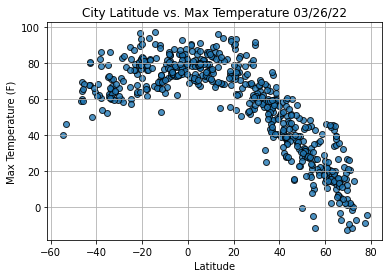

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

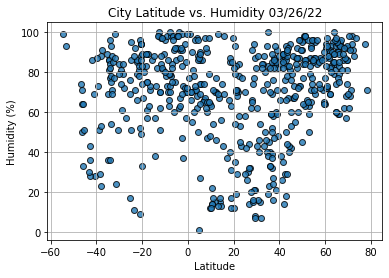

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

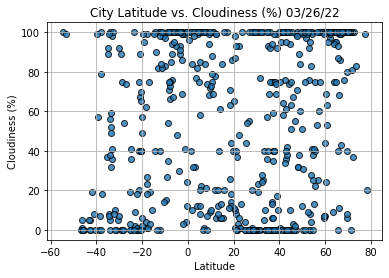

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

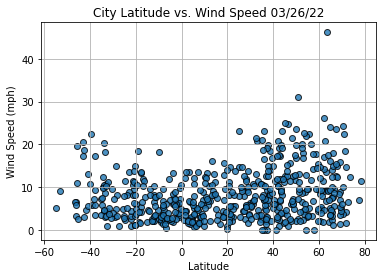

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
#present all the information at index 13
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Cloudiness                      0
Country                        AU
Date          2022-03-27 04:01:18
Humidity                       51
Lat                      -24.8667
Lng                      113.6333
Max Temp                     82.2
Wind Speed                  11.48
Name: 13, dtype: object

In [17]:
#get all Northern Hemisphere latitudes
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,100,US,2022-03-27 03:57:31,71,42.0970,-79.2353,30.02,10.36
1,Hilo,40,US,2022-03-27 03:59:20,97,19.7297,-155.0900,73.26,1.01
5,Victoria,93,HK,2022-03-27 03:56:58,84,22.2855,114.1577,75.25,3.00
7,Kapaa,3,US,2022-03-27 04:01:16,70,22.0752,-159.3190,78.78,1.99
10,Pingzhuang,0,CN,2022-03-27 04:01:17,14,42.0372,119.2889,43.77,20.69
...,...,...,...,...,...,...,...,...,...
547,Pervomayskiy,95,RU,2022-03-27 04:16:15,83,53.2485,40.2871,27.93,16.84
548,Qunduz,94,AF,2022-03-27 04:16:15,37,36.7290,68.8570,59.41,2.66
552,Sopot,0,PL,2022-03-27 04:16:17,86,54.4418,18.5600,30.88,0.00
553,Chandbali,87,IN,2022-03-27 04:16:17,54,20.7833,86.7667,90.64,1.81


In [18]:
#Get top 5 rows
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,100,US,2022-03-27 03:57:31,71,42.0970,-79.2353,30.02,10.36
1,Hilo,40,US,2022-03-27 03:59:20,97,19.7297,-155.0900,73.26,1.01
5,Victoria,93,HK,2022-03-27 03:56:58,84,22.2855,114.1577,75.25,3.00
7,Kapaa,3,US,2022-03-27 04:01:16,70,22.0752,-159.3190,78.78,1.99
10,Pingzhuang,0,CN,2022-03-27 04:01:17,14,42.0372,119.2889,43.77,20.69


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

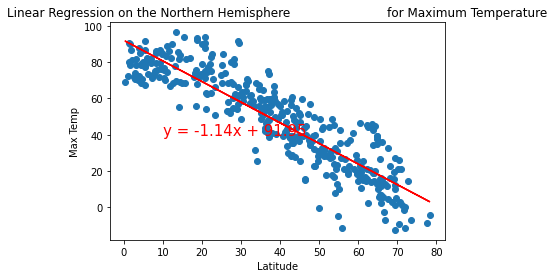

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

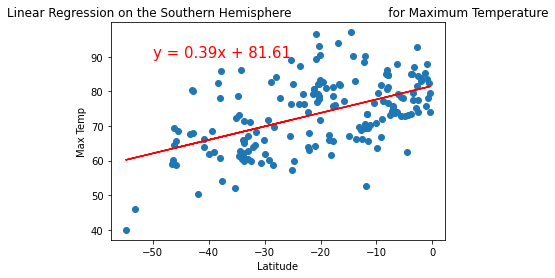

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

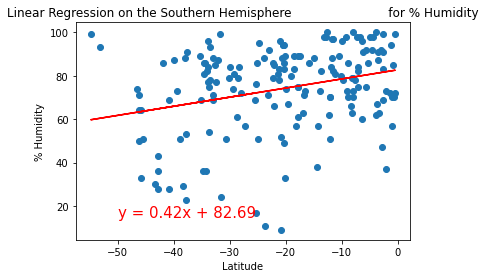

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

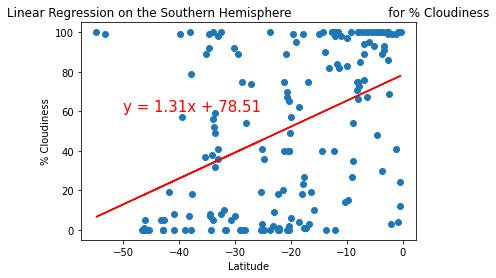

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

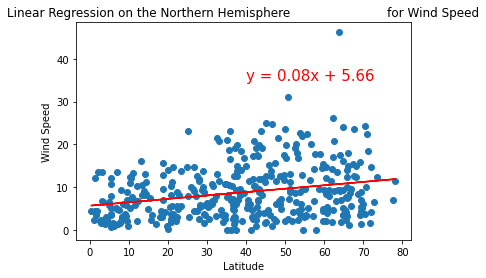

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

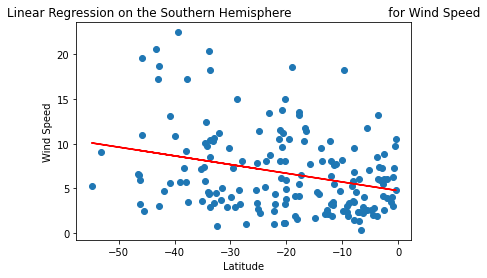

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))